# Movie recomendation system using collaborative filtering

## Dataset treatment

In [90]:
# importing the dataset
import pandas as pd

df = pd.read_csv('data/MovieLens_data/ratings.csv')
df.drop('timestamp', axis=1, inplace=True)
print(df)

          userId  movieId  rating
0              1        2     3.5
1              1       29     3.5
2              1       32     3.5
3              1       47     3.5
4              1       50     3.5
...          ...      ...     ...
20000258  138493    68954     4.5
20000259  138493    69526     4.5
20000260  138493    69644     3.0
20000261  138493    70286     5.0
20000262  138493    71619     2.5

[20000263 rows x 3 columns]


In [102]:
# saving the cleaned dataset
df.to_csv('data/final_data/ratings.csv', index=False)

Since the dataset is organized, there is no need to make any changes to it. The only thing that was done was to remove the timestamp column, which is not necessary for the analysis. And at the end of the process, the cleaned dataset was saved in a new file.
The results will come in the form of a Movie id and the estimated rating for that movie by the user. The results (movie id) will be search in the movies.csv file to get the movie title for the estimated score.

## Exploratory Data Analysis

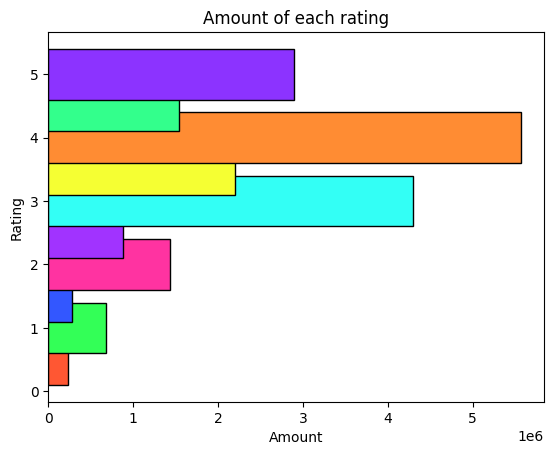

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Reader, Dataset

reader = Reader()
data = Dataset.load_from_df(df, reader)

rating_counts = df['rating'].value_counts().sort_index()

# Plotting the horizontal bar chart with custom colors
colors = ['#FF5733', '#33FF57', '#3357FF', '#FF33A1', '#A133FF', '#33FFF5', '#F5FF33', '#FF8C33', '#33FF8C', '#8C33FF']
plt.barh(rating_counts.index, rating_counts.values, edgecolor='black', color=colors)
plt.xlabel('Amount')
plt.ylabel('Rating')
plt.title('Amount of each rating')
plt.show()

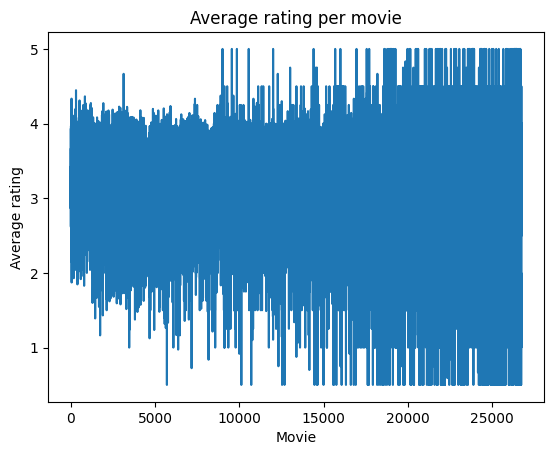

In [92]:
# plotting average rating per movie by movie year
average_rating = df.groupby('movieId')['rating'].mean()

plt.plot(average_rating.values)
plt.xlabel('Movie')
plt.ylabel('Average rating')
plt.title('Average rating per movie')
plt.show()

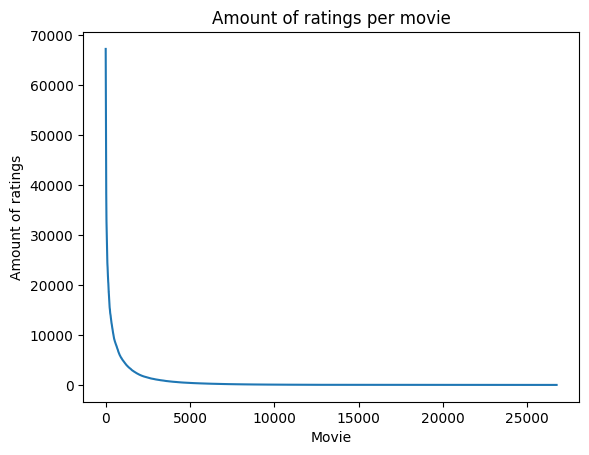

In [93]:
# plotting the amount of ratings per movie

rating_counts = df['movieId'].value_counts()

plt.plot(rating_counts.values)
plt.xlabel('Movie')
plt.ylabel('Amount of ratings')
plt.title('Amount of ratings per movie')
plt.show()

## Joining the information from movies.csv to make a conmplete movies dataset

### Merging the datasets for the movie titles, id and links

In [94]:
import pandas as pd

# load the datasets
df = pd.read_csv('data/MovieLens_data/ratings.csv')
df.drop('timestamp', axis=1, inplace=True)
movies = pd.read_csv('data/MovieLens_data/movies.csv')
movies_links = pd.read_csv("data/MovieLens_data/links.csv")

# merge the datasets on 'movieId'
merged_df = df.merge(movies[['movieId', 'title']], on='movieId')

# select only 'movieId' and 'title' columns
final_df = merged_df[['movieId', 'title']]

# merge with the links dataset to get the imdbId and tmdbId
final_df = final_df.merge(movies_links[['movieId', 'imdbId', 'tmdbId']], on='movieId')

print(final_df.head())

   movieId                                              title  imdbId  tmdbId
0        2                                     Jumanji (1995)  113497  8844.0
1       29  City of Lost Children, The (Cité des enfants p...  112682   902.0
2       32          Twelve Monkeys (a.k.a. 12 Monkeys) (1995)  114746    63.0
3       47                        Seven (a.k.a. Se7en) (1995)  114369   807.0
4       50                         Usual Suspects, The (1995)  114814   629.0


### Merging Imdb dataset information for full movies data

In [95]:
import pandas as pd

# joining the information from movies.csv to make a complete movies dataset
imdb_movies = pd.read_csv('data/Imdb_data/title.basics.tsv', sep='\t', low_memory=False)

print(imdb_movies.columns)
print(imdb_movies.head())

Index(['tconst', 'titleType', 'primaryTitle', 'originalTitle', 'isAdult',
       'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')
      tconst titleType            primaryTitle           originalTitle  \
0  tt0000001     short              Carmencita              Carmencita   
1  tt0000002     short  Le clown et ses chiens  Le clown et ses chiens   
2  tt0000003     short          Pauvre Pierrot          Pauvre Pierrot   
3  tt0000004     short             Un bon bock             Un bon bock   
4  tt0000005     short        Blacksmith Scene        Blacksmith Scene   

  isAdult startYear endYear runtimeMinutes                    genres  
0       0      1894      \N              1         Documentary,Short  
1       0      1892      \N              5           Animation,Short  
2       0      1892      \N              5  Animation,Comedy,Romance  
3       0      1892      \N             12           Animation,Short  
4       0      1893      \N              1  

In [96]:
# change all \N entries to NaN
imdb_movies.replace(r'\N', pd.NA, inplace=True)

print(imdb_movies)

             tconst  titleType               primaryTitle  \
0         tt0000001      short                 Carmencita   
1         tt0000002      short     Le clown et ses chiens   
2         tt0000003      short             Pauvre Pierrot   
3         tt0000004      short                Un bon bock   
4         tt0000005      short           Blacksmith Scene   
...             ...        ...                        ...   
11136774  tt9916848  tvEpisode              Episode #3.17   
11136775  tt9916850  tvEpisode              Episode #3.19   
11136776  tt9916852  tvEpisode              Episode #3.20   
11136777  tt9916856      short                   The Wind   
11136778  tt9916880  tvEpisode  Horrid Henry Knows It All   

                      originalTitle isAdult startYear endYear runtimeMinutes  \
0                        Carmencita       0      1894    <NA>              1   
1            Le clown et ses chiens       0      1892    <NA>              5   
2                    Pauvre

In [97]:
# see all possible title types
print(imdb_movies['titleType'].unique())

# see all possible genres
print(imdb_movies['genres'].unique())

# join short and tvShort into short
imdb_movies.replace({'titleType': {'tvShort': 'short'}}, inplace=True)

# join movie and tvMovie into movies
imdb_movies.replace({'titleType': {'tvMovie': 'movies'}}, inplace=True)

['short' 'movie' 'tvShort' 'tvMovie' 'tvEpisode' 'tvSeries' 'tvMiniSeries'
 'tvSpecial' 'video' 'videoGame' 'tvPilot']
['Documentary,Short' 'Animation,Short' 'Animation,Comedy,Romance' ...
 'Biography,Crime,Fantasy' 'Mystery,Reality-TV,Thriller'
 'Musical,Reality-TV,Talk-Show']


In [98]:
import pandas as pd

# replace tconst with imdbId
imdb_movies['tconst'] = imdb_movies['tconst'].str[2:]
imdb_movies.rename(columns={'tconst': 'imdbId'}, inplace=True)

print(imdb_movies)
print(imdb_movies.columns)

           imdbId  titleType               primaryTitle  \
0         0000001      short                 Carmencita   
1         0000002      short     Le clown et ses chiens   
2         0000003      short             Pauvre Pierrot   
3         0000004      short                Un bon bock   
4         0000005      short           Blacksmith Scene   
...           ...        ...                        ...   
11136774  9916848  tvEpisode              Episode #3.17   
11136775  9916850  tvEpisode              Episode #3.19   
11136776  9916852  tvEpisode              Episode #3.20   
11136777  9916856      short                   The Wind   
11136778  9916880  tvEpisode  Horrid Henry Knows It All   

                      originalTitle isAdult startYear endYear runtimeMinutes  \
0                        Carmencita       0      1894    <NA>              1   
1            Le clown et ses chiens       0      1892    <NA>              5   
2                    Pauvre Pierrot       0      18

In [100]:
# saving the organized dataset
imdb_movies.to_csv('data/final_data/imdb_movies.csv', index=False)

### Getting the episode information

In [99]:
import pandas as pd

# Load the datasets
imdb_episodes = pd.read_csv('data/Imdb_data/title.episode.tsv', sep='\t', low_memory=False)

# change all \N to NaN
imdb_episodes.replace(r'\\N', pd.NA, inplace=True)

# change tconst to imdbId
imdb_episodes['tconst'] = imdb_episodes['tconst'].str[2:]

# change parentTconst to parentImdbId
imdb_episodes['parentTconst'] = imdb_episodes['parentTconst'].str[2:]

# rename the columns
imdb_episodes.rename(columns={'tconst': 'imdbId', 'parentTconst': 'parentImdbId'}, inplace=True)

# change all \N to NaN
imdb_episodes.replace(r'\N', pd.NA, inplace=True)

# remove episodes with season \N or episode \N
imdb_episodes = imdb_episodes[imdb_episodes['seasonNumber'].notna()]
imdb_episodes = imdb_episodes[imdb_episodes['episodeNumber'].notna()]

print(imdb_episodes)
print(imdb_episodes.columns)

          imdbId parentImdbId seasonNumber episodeNumber
1        0041951      0041038            1             9
2        0042816      0989125            1            17
4        0043426      0040051            3            42
5        0043631      0989125            2            16
6        0043693      0989125            2             8
...          ...          ...          ...           ...
8550903  9916846      1289683            3            18
8550904  9916848      1289683            3            17
8550905  9916850      1289683            3            19
8550906  9916852      1289683            3            20
8550907  9916880      0985991            4             2

[6825829 rows x 4 columns]
Index(['imdbId', 'parentImdbId', 'seasonNumber', 'episodeNumber'], dtype='object')


In [101]:
# saving the organized dataset
imdb_episodes.to_csv('data/final_data/imdb_episodes.csv', index=False)

### Getting the ratings information from all movies

In [109]:
import pandas as pd

# Correlating the movies rated in the MovieLens dataset with the movies from the imdb dataset
movies = pd.read_csv('data/final_data/imdb_movies.csv', low_memory=False)
ratings = pd.read_csv('data/final_data/ratings.csv', low_memory=False)
links = pd.read_csv('data/MovieLens_data/links.csv', low_memory=False) # contains the tmdbId and imdbId

# dropping the userId from ratings
ratings.drop('userId', axis=1, inplace=True)

# getting all individual moviesId from the ratings dataset (they repeat)
ratings = ratings.drop_duplicates(subset='movieId')

# getting the imdbId from the links dataset
ratings = ratings.merge(links[['movieId', 'imdbId']], on='movieId')

# dropping the rating column
ratings.drop('rating', axis=1, inplace=True)

# merging the movies dataset with the ratings dataset (by imdbId) using an inner join
movies = movies.merge(ratings, on='imdbId', how='inner')

print(movies)
print(movies.columns)

        imdbId  titleType                               primaryTitle  \
0            5      short                           Blacksmith Scene   
1            8      short     Edison Kinetoscopic Record of a Sneeze   
2           10      short                        Leaving the Factory   
3           12      short                     The Arrival of a Train   
4           14      short                        The Waterer Watered   
...        ...        ...                                        ...   
26689  4377918      movie                        Crazy Beautiful You   
26690  4397346      movie                              Bikes vs Cars   
26691  4438688      movie                              Polskie gówno   
26692  4475970      short                              Power Rangers   
26693  4530184  tvSpecial  Aziz Ansari Live in Madison Square Garden   

                                   originalTitle  isAdult  startYear  endYear  \
0                               Blacksmith Scene      

In [110]:
# saving the organized dataset
movies.to_csv('data/final_data/movies.csv', index=False)